# 4. Data Partitioning

In this notebook, we will explain the different types of data partitions used in machine learning: training data, testing data, and validation data. We will also cover the concepts of model validation and cross-validation. Finally, we will demonstrate these concepts with a simple example using fictitious data.

---

## 4.1 Training, Testing, and Validation Data

The dataset considered for a machine learning analysis can be divided into three subsets:
- **Training Set**: Used to learn the parameters of the model.
- **Validation Set**: Used to evaluate the model during the training phase. This step can be omitted by proceeding directly to the testing phase.
- **Testing Set**: Once the model is built from the training set, it is evaluated using the testing set, which contains samples that were not used for training.

### Training Set
The training set is the portion of the data used to train the model. The model learns the relationships between the input features and the target variable from this data.

### Validation Set
The validation set is used to evaluate the model's performance during the training phase. This helps in tuning the model's hyperparameters and preventing overfitting.

### Testing Set
The testing set is used to evaluate the final model. It provides an unbiased evaluation of the model's performance on unseen data.

---

## 4.2 Cross-Validation

Cross-validation allows the entire dataset to be used for both training and validation. Two well-known strategies are:
- **K-Fold Cross-Validation**
- **Leave-One-Out Cross-Validation**
- **Bootstrap**

### K-Fold Cross-Validation
- The original dataset is divided into k equally sized folds.
- One fold is used for validation, while the remaining k-1 folds are used for training.
- This process is repeated k times, with each fold used exactly once as the validation data.
- The cost function is computed k times, and the average is calculated.

**Stratification**: Stratification is the process of dividing the general population into homogeneous subgroups before sampling. The goal of stratification is to create folds such that they contain approximately the same proportions of individuals from each class. This reduces the risk of negatively impacting the model's performance by ensuring that the training set does not contain only individuals from a particular class.

### Leave-One-Out Cross-Validation (LOOCV)
- The original dataset of n individuals is divided into n partitions, with k = n.
- One individual is kept for testing, and the remaining k-1 individuals are used for training.
- This process is repeated for each individual.

---

## 4.3 Example: Data Partitioning and Cross-Validation

We will now demonstrate the concepts discussed above with a simple example using fictitious data.

In [22]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Generate some fictitious data
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature: 100 random numbers between 0 and 10
y = 2.5 * X + np.random.randn(100, 1) * 2  # Target: linear relation with some noise

# Convert to pandas DataFrame
data = pd.DataFrame(np.hstack((X, y)), columns=['Feature', 'Target'])
data.head()

,Feature,Target
0,5.488135,11.390038
1,7.151894,19.681387
2,6.027634,16.000409
3,5.448832,10.549592
4,4.236548,13.567874


In [23]:
# Split the data into training, validation, and testing sets (60% training, 20% validation, 20% testing)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=0)  # 0.25 x 0.8 = 0.2

In [24]:
# Display the shapes of the resulting datasets
print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation data shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)

Training data shape (X_train, y_train): (60, 1) (60, 1)
Validation data shape (X_val, y_val): (20, 1) (20, 1)
Testing data shape (X_test, y_test): (20, 1) (20, 1)


In [25]:
# Create and train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Evaluate the model on the validation data
val_score = model.score(X_val, y_val)
print("Model validation score (R^2):", val_score)

Model validation score (R^2): 0.9055777921519857


In [27]:
# Evaluate the model on the testing data
test_score = model.score(X_test, y_test)
print("Model test score (R^2):", test_score)

Model test score (R^2): 0.9329584400452917


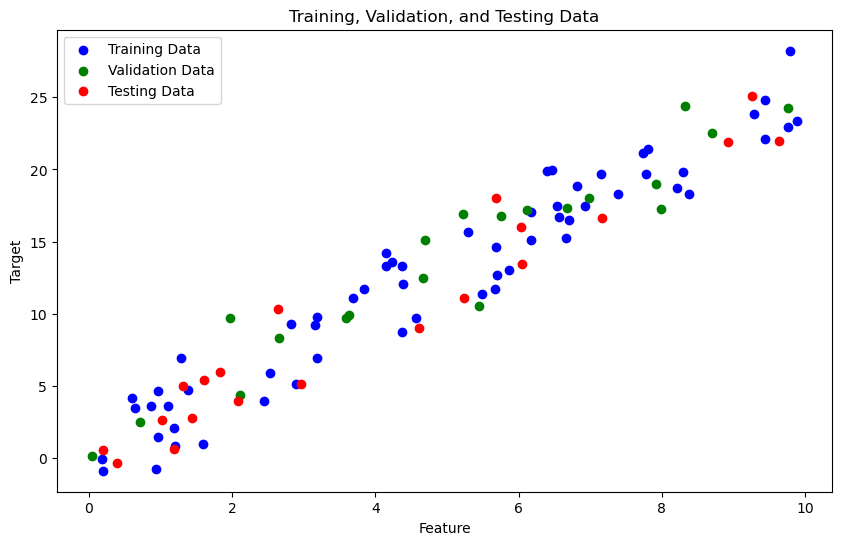

In [28]:
# Visualize the Training, Validation, and Testing Data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_val, y_val, color='green', label='Validation Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Training, Validation, and Testing Data')
plt.legend()
plt.show()

In [29]:
# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(model, X, y, cv=kfold)
print("K-Fold Cross-Validation scores:", cv_scores)
print("Average K-Fold Cross-Validation score:", np.mean(cv_scores))

K-Fold Cross-Validation scores: [0.929585   0.91300086 0.91684308 0.95382004 0.84081603]
Average K-Fold Cross-Validation score: 0.910812999935156


In [30]:
# Leave-One-Out Cross-Validation
loo = LeaveOneOut()
loo_mse = []
for train_index, test_index in loo.split(X):
    X_train_loo, X_test_loo = X[train_index], X[test_index]
    y_train_loo, y_test_loo = y[train_index], y[test_index]
    model.fit(X_train_loo, y_train_loo)
    y_pred_loo = model.predict(X_test_loo)
    loo_mse.append(mean_squared_error(y_test_loo, y_pred_loo))
print("Leave-One-Out Cross-Validation score (MSE):", np.mean(loo_mse))

Leave-One-Out Cross-Validation score (MSE): 4.122827477685933


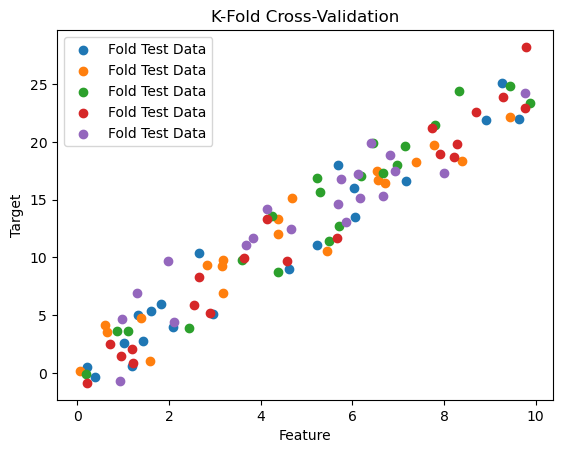

In [31]:
# Visualize K-Fold Cross-Validation
for train_index, test_index in kfold.split(X):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(X_train_fold, y_train_fold)
    plt.scatter(X_test_fold, y_test_fold, label='Fold Test Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('K-Fold Cross-Validation')
plt.legend()
plt.show()